In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [62]:
def EInfections(p0=0.25, P=[0.1, 0.5, 0.9], C=2):
    
    u1, u2, u3 = P
    
    x = torch.linspace(0, torch.pi/4, 10000)

    capa1 = lambda x: torch.sin(x) + torch.cos(x) + torch.tan(x)
    capa2 = lambda x: ((C+1)/C)*(torch.sin(x) + torch.cos(x) + torch.tan(x)) + ((torch.sin(x) + torch.cos(x) + 2*torch.tan(x))/(2*C))
    capa3 = lambda x: ((C**2+C+1)/C**2)*(torch.sin(x) + torch.cos(x) + torch.tan(x)) + ((torch.sin(x) + torch.cos(x) + 2*torch.tan(x))/(2*C)) + ((torch.sin(x) + torch.cos(x) + 2*torch.tan(x))/(2*(C**2))) + ((torch.sin(x) + torch.cos(x) + 6*torch.tan(x))/(4*(C**2)))

    y1 = capa1(x)
    y2 = capa2(x)
    y3 = capa3(x)

    a = torch.trapz(y1,x)
    b = torch.trapz(y2,x)
    c = torch.trapz(y3,x)

    E = 8*u1*p0 + ((u2-u1)*a + (u3-u2)*b + (1-u3)*c)*(4/torch.pi)

    return E.item()


In [63]:
EInfections()

2.535475730895996

# 1. Convergencia computacional

In [64]:
import sys
sys.path.append('..')
from spread import *

P = [0.1, 0.5, 0.9], p0 = 0.25, C = 2
E = 2.535475730895996
P = [0.1, 0.5, 0.9], p0 = 0.25, C = 4
E = 2.1156888008117676
P = [0.1, 0.5, 0.9], p0 = 0.5, C = 2
E = 2.735475778579712
P = [0.1, 0.5, 0.9], p0 = 0.5, C = 4
E = 2.3156888484954834


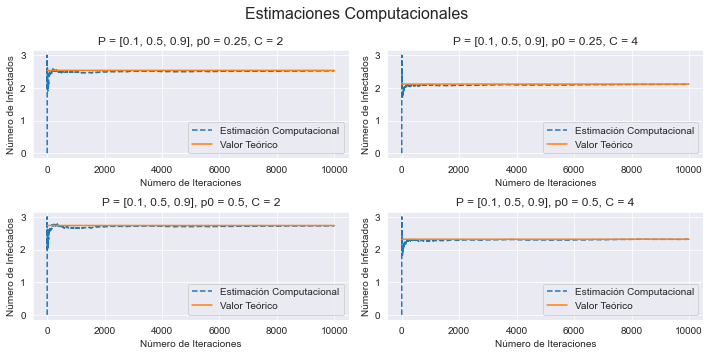

In [65]:
part = [0.1, 0.5, 0.9]
sns.set_style('darkgrid')
fig, ax = plt.subplots(2, 2, figsize=(10, 5))

i=0
for p0 in [0.25, 0.5]:
    j=0
    for C in [2, 4]:
        print(f'P = {part}, p0 = {p0}, C = {C}')
        print(f'E = {EInfections(p0=p0, P=part, C=C)}')

        est_inf = torch.zeros(10001)

        for k in range(1, 10001):

            torch.manual_seed(k)

            theta = (torch.pi/4)*torch.rand(1).flatten().numpy()
            rho = torch.rand(1).flatten().numpy()
            temp = torch.rand(1).flatten().numpy()
            hum = torch.rand(1).flatten().numpy()

            df = pd.DataFrame({'Theta': theta, 'Rho': rho, 'Temperatura': temp, 'Humedad': hum})
            
            grid = Grid(N=11)
            grid.set_param(part=part, p0=p0, div=C)
            grid.load_data(df=df)
            grid.submatrix()
            grid.enlargement_process()
            grid.Spread(seed=k)
            #print(grid.infected)
            est_inf[k] = (est_inf[k-1] + grid.infected)
        est_inf[1:] = est_inf[1:]/torch.arange(1, 10001)

        ax[i, j].plot(est_inf, '--', label='Estimación Computacional')
        ax[i, j].plot(range(10001), [EInfections(P=part, p0=p0, C=C)]*10001, label='Valor Teórico')
        ax[i, j].legend(loc='best')
        ax[i, j].set_xlabel('Número de Iteraciones')
        ax[i, j].set_ylabel('Número de Infectados')
        ax[i, j].set_title(f'P = {part}, p0 = {p0}, C = {C}')
        
        j += 1
    
    i += 1

fig.suptitle('Estimaciones Computacionales', fontsize=16)
fig.subplots_adjust(top=0.5)
plt.tight_layout()
plt.show()

In [88]:
fig.set_size_inches(9, 7)
fig.subplots_adjust(top=0.9)

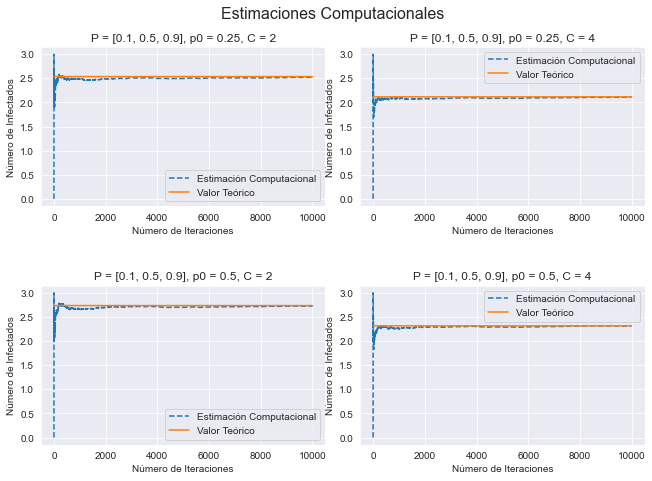

In [89]:
fig

In [90]:
fig.savefig('../figures/expected_values.png')
fig.savefig('../figures/expected_values.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
